# SHARKY PROJECT!
--------------------------------

## Objective

In this project we are going to take a look at the Shark attack data base from http://www.sharkattackfile.net.
Specifically, I want to investigate daily differences in shark behavior. Are sharks more 'aggresive' during the night?  

## Importing dependencies and reading the data 

In [79]:
import pandas as pd
import numpy as np
import cleaning_functions as fn

#To get rid of the warning in jupyter
pd.options.mode.chained_assignment = None  # default='warn'

In [80]:
df = pd.read_csv('../attacks.csv', encoding='latin-1')

## Exploring the data

* Let's take a look at the structure of the data

In [81]:
print(df.shape)
print(df.columns)
df

(25723, 24)
Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A number of columns will be of no use for this analysis. I will get rid of those in order to simplify the data. <br>

Likewise, it looks like the tail of the data frame is composed of empty entries that will be removed as well.<br>


In [82]:
df.describe(include='all')

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
count,8702,6302,6300.000000,6298,6252,5847,5762,5758,6092,5737,...,3464,6285,6302,6301,6302,6302,6302,6309.000000,1,2
unique,6287,5433,NaN,8,212,825,4108,1532,5230,6,...,1549,4969,6291,6290,6285,6285,6286,NaN,1,2
top,0,1957,NaN,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,...,White shark,"C. Moore, GSAF",1898.00.00.R-Syria.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1907.10.16.R,1920.00.00.b,NaN,stopped here,change filename
freq,2400,11,NaN,4595,2229,1037,163,971,550,5094,...,163,105,2,2,4,2,2,NaN,1,1
mean,NaN,NaN,1927.272381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3155.999683,NaN,NaN
std,NaN,NaN,281.116308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1821.396206,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN
25%,NaN,NaN,1942.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1579.000000,NaN,NaN
50%,NaN,NaN,1977.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3156.000000,NaN,NaN
75%,NaN,NaN,2005.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4733.000000,NaN,NaN


* Let's take a closer look at those columns of interest:<br>

Provoked attacks or attacks arising from specific causes can trigger somehow unnatural responses in sharks. Therefore, I am interested in reported 'Unprovoked' attacks

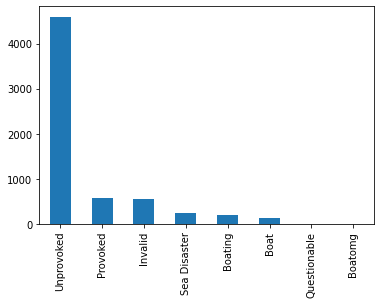

In [83]:
%matplotlib inline
df.Type.value_counts().plot.bar()

Most of the data consist of 'Unprovoked' attacks. That's good.<br>
However, the time column is a complete mess, that's not good:

In [84]:
#First instances of Time
df.Time.unique()[:50]

array(['18h00', '14h00  -15h00', '07h45', nan, 'Late afternoon', '17h00',
       '14h00', 'Morning', '15h00', '08h15', '11h00', '10h30', '10h40',
       '16h50', '07h00', '09h30', 'Afternoon', '21h50', '09h40', '08h00',
       '17h35', '15h30', '07h30', '19h00, Dusk', 'Night', '16h00',
       '15h01', '12h00', '13h45', '23h30', '09h00', '14h30', '18h30',
       '12h30', '16h30', '18h45', '06h00', '10h00', '10h44', '13h19',
       'Midday', '13h30', '10h45', '11h20', '11h45', '19h30', '08h30',
       '15h45', 'Shortly before 12h00', '17h34'], dtype=object)

Other columns of interest will be the kind of activity that the person was doing and whether or not the attack resulted in a casualty. Let's explore those variables:

In [85]:
print(len(df.Activity.unique()))
df.Activity.value_counts()

1533


Surfing                                                                                         971
Swimming                                                                                        869
Fishing                                                                                         431
Spearfishing                                                                                    333
Bathing                                                                                         162
                                                                                               ... 
Attempting to free the shark                                                                      1
Moving shark from tuna vessel when boat rolled, placing both man & shark in chest-deep water      1
Washing hands                                                                                     1
                                                                                                  1


Although most of the observations fall within five categories, there is quite some work to do on this column...


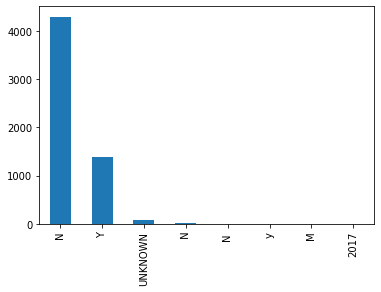

In [86]:
df['Fatal (Y/N)'].value_counts().plot.bar()

Not bad, this one, most of the observations are correctly labeled...

## Removal of excess of columns and rows

In [87]:
df.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

First, I will use the custom fixcolnames function to get rid of spaces and uppercases in the columns names so it is easier to access to them:  

In [88]:
df.columns = fn.fixcolnames(df.columns)
df

,case_number,date,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number.1,case_number.2,original_order,unnamed:_22,unnamed:_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
useful_columns = ['date', 'year', 'country','activity','fatal', 'time']

df_clean = df[useful_columns]

print(df.shape)
df_clean.head()

(25723, 24)


,date,year,country,activity,fatal,time
0,25-Jun-2018,2018.0,USA,Paddling,N,18h00
1,18-Jun-2018,2018.0,USA,Standing,N,14h00 -15h00
2,09-Jun-2018,2018.0,USA,Surfing,N,07h45
3,08-Jun-2018,2018.0,AUSTRALIA,Surfing,N,NaN
4,04-Jun-2018,2018.0,MEXICO,Free diving,N,NaN


Most of the rows consist of lines of filled with NaN. If I remove duplicates, I can get rid of those lines and any other potential duplicate that may exist.

In [91]:
df_clean = df_clean.drop_duplicates()
df_clean.shape

(6235, 6)

Unfortunatelly, many more of the observations have NaN in the Time column:

In [92]:
df_clean[df_clean.time.isnull()]

,date,year,country,activity,fatal,time
3,08-Jun-2018,2018.0,AUSTRALIA,Surfing,N,NaN
4,04-Jun-2018,2018.0,MEXICO,Free diving,N,NaN
5,03-Jun-2018,2018.0,AUSTRALIA,Kite surfing,N,NaN
7,27-May-2018,2018.0,USA,Fishing,N,NaN
11,21-May-2018,2018.0,USA,Boogie boarding,N,NaN
...,...,...,...,...,...,...
6298,Before 1903,0.0,AUSTRALIA,Pearl diving,Y,NaN
6299,1900-1905,0.0,USA,Swimming,Y,NaN
6300,1883-1889,0.0,PANAMA,NaN,Y,NaN
6301,1845-1853,0.0,CEYLON (SRI LANKA),Swimming,Y,NaN


In [93]:
# Delete rows with null times:
df_trim = df_clean[~df_clean.time.isnull()]

We can see that, at least the columns of interest, are empty of null values: 

In [94]:
df_trim.isnull().sum()

date          0
year          0
country       7
activity     66
fatal       146
time          0
dtype: int64

## Fixing column's values

### Time and night_day columns

First, I am going to extract the hour of the attacks where this is specify by using the custom function `fixtime` that uses a regex pattern for that (`\d{1,2}(?=[a-z]|:|\d{2})`). If exact hour is not reported, the function give back the value untouch, so it can be assesed later.<br><br>
Then I use the custom `timeclassify`  function that assign each time to 'night' (I include here also early morning and evening times, when sharks are more active) or 'day' depending on the time, or 'None' if it's not a valid time.

In [95]:
#Use the custom function fixtime on time
df_trim['time'] = fn.fixtime(df_trim.time)

#Create new column by using the timeclassify custom function:
df_trim['night_day'] = fn.timeclassify(df_trim.time)

Let's check those that didn't return a valid value

In [96]:
df_trim[df_trim['night_day'].isnull()][['time', 'night_day']]

,time,night_day
958,AM,None
979,A.M.,None
1384,,None
1730,--,None
1731,--,None
1790,--,None
1797,--,None
1799,--,None
1826,,None
1855,,None


AM and PM are quite ambiguous, both can be night or day. There are some missing values, but there is one misspelling in 'Late afternon' that I can fix manually and then remove the rows where time is null:

In [97]:
df_trim.loc[df_trim.time == 'Late afternon','night_day'] = 'Day'
df_trim = df_trim[~df_trim.night_day.isnull()]

In [98]:
df_trim.isnull().sum()

date           0
year           0
country        6
activity      65
fatal        144
time           0
night_day      0
dtype: int64

### Fatal column


Fatal is the another important column that needs to bi fixed and I should not have null values in it. 

In [99]:
df_trim.fatal.value_counts()

N          2257
Y           481
UNKNOWN       7
 N            3
M             1
2017          1
Name: fatal, dtype: int64

There are just seven "unkown" for which I cannot know the real outcome of the attack, therefore, I should get rid of them.<br> 
Then, there are a couple of misspellings that I can fix manually:

In [101]:
df_trim.loc[(df_trim.fatal == ' N')|(df_trim.fatal =='M'), 'fatal'] = 'N'

In [102]:
df_trim = df_trim[~((df_trim.fatal=='UNKNOWN')|(df_trim.fatal =='2017'))]

df_trim.fatal.value_counts()

N    2261
Y     481
Name: fatal, dtype: int64

To aid plot creation, I will create two more dummy variables, fy(fatal yes) and fn(fatal no)

In [103]:
df_trim['fy'] = np.where(df_trim.fatal == 'Y', 1, 0)
df_trim['fn'] = np.where(df_trim.fatal == 'N', 1, 0)
df_trim[['fy', 'fn']]

,fy,fn
0,0,1
1,0,1
2,0,1
6,1,0
8,0,1
...,...,...
6241,0,1
6242,0,1
6243,0,1
6259,1,0


### Activity column

The next column of interest is activity. In this case, instead of deleting the rows with a null value for activity, I can just assign them an 'Unknown' value with fillna:

In [104]:
print(df_trim.activity.isnull().value_counts())

False    2821
True       65
Name: activity, dtype: int64


In [105]:
df_trim['activity'] = df_trim.activity.fillna('Unknown')

And now, with the custom function fixactiv, I will reclassify the activity in only five categories. For this, fixactivity looks for certain key words within the string and identifyies one of four general activities. If it fails to put it in one of those four categories, fixactiv puts it in the category 'others'.

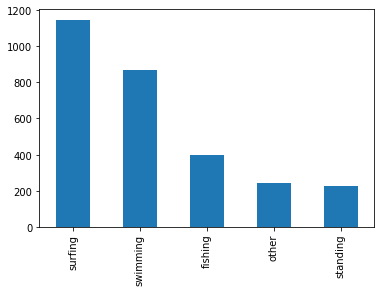

In [106]:
df_trim['activity'] = fn.fixactiv(df_trim.activity)
df_trim['activity'].value_counts().plot.bar()

### Year column

Finally, I will use year to check for the time variation of my hypothesis. It will need a bit of fixing.<br> Letś look at its distribution, minimum and maximum value and range:

In [107]:
df_trim.year.agg(['max', 'min', lambda x: max(x) - min(x)])

max         2018.0
min            0.0
<lambda>    2018.0
Name: year, dtype: float64

It is a numeric, but it's a float. It seems that there are some zeroes as well. Let's make it integer and see its distribution:

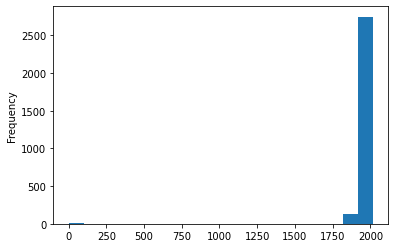

In [108]:
df_trim['year'] = df_trim.year.apply(int)
df_trim.year.plot.hist(bins = 20)

In [109]:
df_trim[df_trim.year == 0][['date', 'year']]

,date,year
6200,Before 2009,0
6228,"No date, Before 1969",0
6241,1960s,0
6242,1960s,0
6243,1960s,0
6259,1941-1945,0
6265,1941-1942,0


Not that many values with zero. Using the date, we can infer a year:

In [110]:
df_trim.loc[df_trim.year==0, 'year'] = [2008, 1968, 1960, 1960, 1960, 1941, 1941]

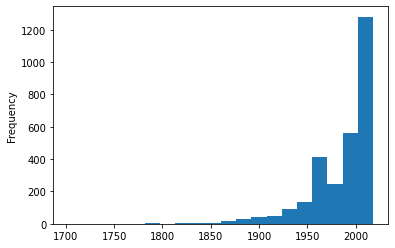

In [111]:
df_trim.year.plot.hist(bins = 20)

In [114]:
df_trim.year.agg(['max', 'min', lambda x: max(x) - min(x)])

max         2018
min         1703
<lambda>     315
Name: year, dtype: int64

It looks better now, but it is still too many years. It is better to aggregate the data in some bins; for example, decades

In [115]:
df_trim["decade"] = pd.cut(df_trim.year,
                                bins=[1703, 1960, 1970, 1980, 1990, 2000, 2010, 2020], 
                                labels=["1950bef","1960", "1970","1980","1990", "2000", "2010"])
                        #["pre 60's","60's", "70's","80's","90's", "00's", "10's"])

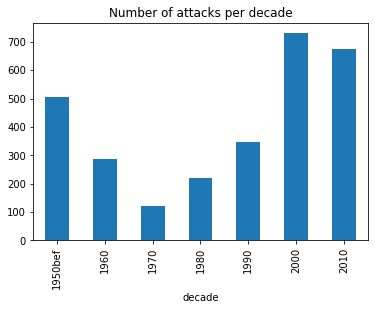

In [116]:
df_trim.groupby('decade').decade.agg(len).plot.bar(title = 'Number of attacks per decade')

Finally, I can save the data of interest into a csv to start working with it:

In [118]:
columns = ['year', 'activity', 'fatal', 'night_day', 'fy', 'fn', 'decade']
df_trim[columns].to_csv('data_sharks_clean.csv', sep=",", header=True)

### Country column (Bonus)

In [30]:
data.country.unique()

array(['USA', 'BRAZIL', 'SOUTH AFRICA', 'COSTA RICA', 'AUSTRALIA',
       'MALDIVES', 'BAHAMAS', 'NEW CALEDONIA', 'CUBA', 'MAURITIUS',
       'NEW ZEALAND', 'JAPAN', 'ST HELENA, British overseas territory',
       'SPAIN', 'REUNION', 'UNITED ARAB EMIRATES', 'MEXICO', 'INDONESIA',
       'COLUMBIA', 'EGYPT', 'Fiji', 'DOMINICAN REPUBLIC', 'ECUADOR',
       'MOZAMBIQUE', 'THAILAND', 'PUERTO RICO', 'FRENCH POLYNESIA',
       'FRANCE', 'ISRAEL', 'JAMAICA', 'PAPUA NEW GUINEA', 'RUSSIA',
       'SEYCHELLES', 'TURKS & CAICOS', 'FIJI', 'SAMOA', 'TONGA',
       'SOUTH KOREA', 'VIETNAM', 'MADAGASCAR',
       'UNITED ARAB EMIRATES (UAE)', 'PANAMA', 'PHILIPPINES', 'CROATIA',
       'SOLOMON ISLANDS', 'YEMEN', 'ST. MAARTIN', 'GRAND CAYMAN',
       'VANUATU', 'MEXICO ', 'VENEZUELA', 'MICRONESIA', 'OKINAWA',
       'MARSHALL ISLANDS', 'EGYPT / ISRAEL', 'HONG KONG', 'CHILE',
       'ITALY', nan, 'GRENADA', 'IRAQ', 'MALAYSIA', 'BERMUDA', 'SENEGAL',
       'TURKEY', 'SINGAPORE', 'NEW BRITAIN', 'TAIWAN', 

In [31]:
#a = data.country.apply(fn.hemis)


In [32]:
fix=[]
for e in list(data.country.unique()):
    if fn.hemis(e) == None:
        fix.append(e)
fix

['USA',
 'BAHAMAS',
 'ST HELENA, British overseas territory',
 'REUNION',
 'COLUMBIA',
 'TURKS & CAICOS',
 'UNITED ARAB EMIRATES (UAE)',
 'ST. MAARTIN',
 'GRAND CAYMAN',
 'MEXICO ',
 'MICRONESIA',
 'OKINAWA',
 'EGYPT / ISRAEL',
 nan,
 'NEW BRITAIN',
 'JOHNSTON ISLAND',
 'PACIFIC OCEAN ',
 'SOUTH PACIFIC OCEAN',
 'BRITISH WEST INDIES',
 'MID ATLANTIC OCEAN',
 'PERSIAN GULF',
 'NORTH PACIFIC OCEAN',
 'NICARAGUA ',
 'ANDAMAN / NICOBAR ISLANDAS',
 'NORTH ATLANTIC OCEAN ',
 'THE BALKANS',
 'PACIFIC OCEAN',
 'CARIBBEAN SEA',
 'SOUTH ATLANTIC OCEAN',
 'ENGLAND',
 'EGYPT ',
 'YEMEN ',
 'ANDAMAN ISLANDS',
 'RED SEA?']

In [90]:
data.to_csv('data_clean.csv', sep=",", header=True)